# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
total_rides_by_city_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#  4. Get the average fare per ride for each city type. 
avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [15]:
# 5. Get the average fare per driver for each city type. 
avgfare_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfare_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [18]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()

pyber_summary_df["Total Rides"] = total_rides_by_city_type
pyber_summary_df["Total Drivers"] = total_drivers_by_city_type
pyber_summary_df["Total Fares"] = total_fares_by_city_type
pyber_summary_df["Average Fare per Ride"] = avgfares_perride_by_city_type
pyber_summary_df["Average Fare per Driver"] = avgfare_perdriver_by_city_type

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [19]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [41]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [22]:
# Print the merged DataFrame for reference.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [28]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_per_date_df=pyber_data_df.groupby(["type","date"]).sum()["fare"]
total_fare_per_date_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [29]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_date_df=total_fare_per_date_df.reset_index()
total_fare_per_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [30]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_date_pivot=total_fare_per_date_df.pivot(index="date", columns="type")
total_fare_per_date_pivot.head()

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [32]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filtered_fare_date_df = total_fare_per_date_pivot.loc['2019-01-01':'2019-04-29']
filtered_fare_date_df.head()

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [34]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
filtered_fare_date_df.index=pd.to_datetime(filtered_fare_date_df.index)
filtered_fare_date_df.head()

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [35]:
# 6. Check that the datatype for the index is datetime using df.info()
filtered_fare_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [36]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_per_week_df=filtered_fare_date_df.resample("W").sum()
sum_fares_per_week_df.head()

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94

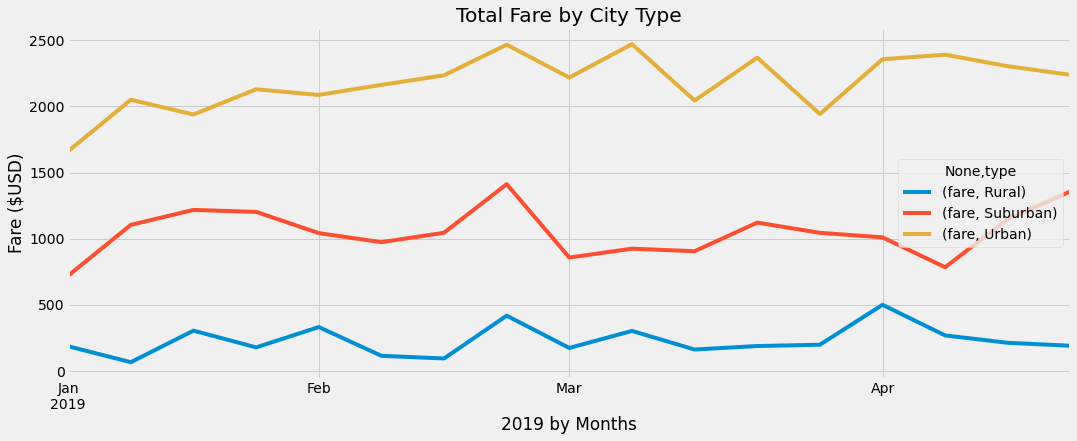

In [38]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = sum_fares_per_week_df.plot(figsize=(16,6))
ax.plot()
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('2019 by Months')

plt.savefig("../Resources/PyBer_Analysis/PyBer_fare_summary.png")
plt.show()